In [17]:
import seaborn as sns
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.stattools import jarque_bera
%matplotlib inline 

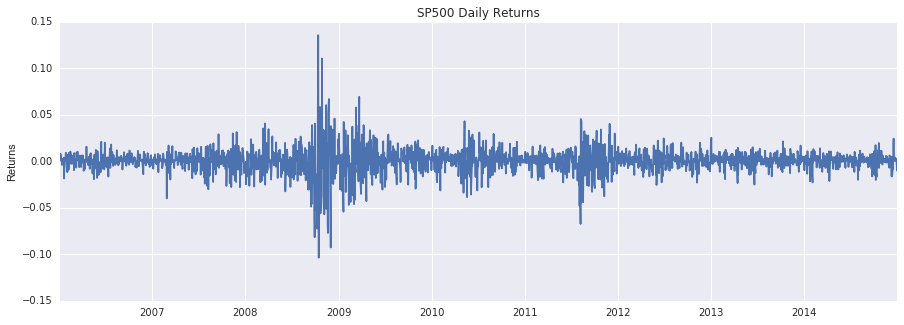

In [23]:
df = DataReader('SPY',  'yahoo', datetime(2006,1,1), datetime(2015,1,1))
df_ret = pd.DataFrame(np.diff(np.log(df['Adj Close'].values)))
df_ret.index = df.index.values[1:df.index.values.shape[0]]
df_ret.columns = ['SP500']

plt.figure(figsize=(15,5));
plt.plot(df_ret);
plt.ylabel('Returns');
plt.title('SP500 Daily Returns');
plt.show();

(array([ 16954.78242481]),
 array([ 0.]),
 array([-0.08759018]),
 array([ 16.405297]))

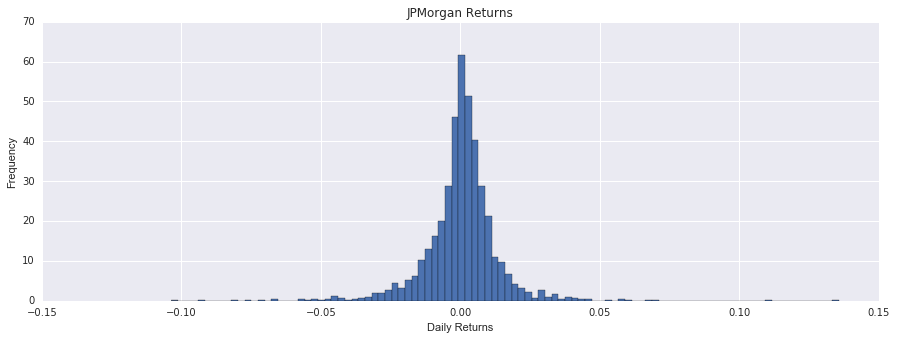

In [19]:
jpm_returns.hist(figsize=(15,5),bins=100, normed=True)
plt.ylabel("Frequency")
plt.xlabel("Daily Returns");
jarque_bera(jpm_returns)

In [12]:
jpm_variance = (jpm_returns.var())
jpm_semivariance =(jpm_returns[jpm_returns<0].var())
print(jpm_variance)
print(jpm_semivariance)
print(jpm_semivariance/jpm_variance)

JPMorgan Returns    0.000815
dtype: float64
JPMorgan Returns    0.000489
dtype: float64
JPMorgan Returns    0.599876
dtype: float64


In [13]:
shortfall_prob = jpm_returns.values[jpm_returns.values<-0.01].shape[0] /jpm_returns.values.shape[0]
print("Probability of daily return below -1% is " + str(round(shortfall_prob*100,2)) + "%")

Probability of daily return below -1% is 25.53%


In [14]:

print("The worst 5% of JPM daily returns exceeded a " 
      + str(round(np.percentile(jpm_returns.values,5)*100,2)) 
      + "% return")

The worst 5% of JPM daily returns exceeded a -3.91% return


In [6]:
jpm_returns.head(5)

,JPMorgan Returns
2006-01-04,-0.005788
2006-01-05,0.003024
2006-01-06,0.007021
2006-01-09,0.016111
2006-01-10,0.001474
